# Africa Economic, Banking and Systemic Crisis Data (EDA)
#### Data on Economic and Financial crises in 13 African Countries (1860 to 2014)

### Dataset description:

<b>caseA:</b> number which denotes a specific country. <br>
<b>cc3A:</b> three letter country code. <br>
<b>country:</b> The name of the country. <br>
<b>year:</b> The year of the observation. <br>
<b>systemic_crisis:</b> "0" means that no systemic crisis occurred in the year and "1" means that a systemic crisis occurred in the year. <br>
<b>exch_usd:</b> The exchange rate of the country vis-a-vis the USD <br>
<b>domestic_debt_in_default:</b> "0" means that no sovereign domestic debt default occurred in the year and "1" means that a sovereign domestic debt default occurred in the year. <br>
<b>sovereign_external_debt_default:</b> "0" means that no sovereign external debt default occurred in the year and "1" means that a sovereign external debt default occurred in the year. <br>
<b>gdp_weighted_default:</b> The total debt in default vis-a-vis the GDP <br>
<b>inflation_annual_cpi:</b> The annual CPI Inflation rate. <br>
<b>independence:</b> "0" means "no independence" and "1" means "independence". <br>
<b>currency_crises:</b> "0" means that no currency crisis occurred in the year and "1" means that a currency crisis occurred in the year. <br>
<b>inflation_crises:</b> "0" means that no inflation crisis occurred in the year and "1" means that an inflation crisis occurred in the year. <br>
<b>banking_crisis:</b> "no_crisis" means that no banking crisis occurred in the year and "crisis" means that a banking crisis occurred in the year. <br>

### Importing libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
plt.style.use('ggplot')
%matplotlib inline

### Importing data

In [5]:
df_africa = pd.read_csv('african_crises.csv')
df_africa.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [6]:
df_africa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
case                               1059 non-null int64
cc3                                1059 non-null object
country                            1059 non-null object
year                               1059 non-null int64
systemic_crisis                    1059 non-null int64
exch_usd                           1059 non-null float64
domestic_debt_in_default           1059 non-null int64
sovereign_external_debt_default    1059 non-null int64
gdp_weighted_default               1059 non-null float64
inflation_annual_cpi               1059 non-null float64
independence                       1059 non-null int64
currency_crises                    1059 non-null int64
inflation_crises                   1059 non-null int64
banking_crisis                     1059 non-null object
dtypes: float64(3), int64(8), object(3)
memory usage: 116.0+ KB


### Data cleaning

In [7]:
# Removing some columns that we are not going to use
cleaned_df = df_africa.drop(['case', 'cc3'], axis =1)

# Changing data values in 'banking_crises' column to 0 and 1
cleaned_df['banking_crisis'] = cleaned_df['banking_crisis'].apply(lambda x: 1 if x=='crisis' else 0)

# Removing incorrect values in column 'currency_crises'
cleaned_df['currency_crises'] = cleaned_df['currency_crises'].replace(2,np.nan)
cleaned_df = cleaned_df.dropna()
cleaned_df['currency_crises']=cleaned_df['currency_crises'].astype(int)

### Systemic crises over the years in Africa

A systemic financial crisis result from a "domino effect" in which the collapse of an important financial institution (bank, investment or pension fund) spread to all the financial and monetary system. Therefore, systemic crises are expected to <b>have a high correlation</b> with banking crises.<br> Let's look at the correlation between these two variables and how they behave:

Text(0.5, 1, 'Correlation Heatmap')

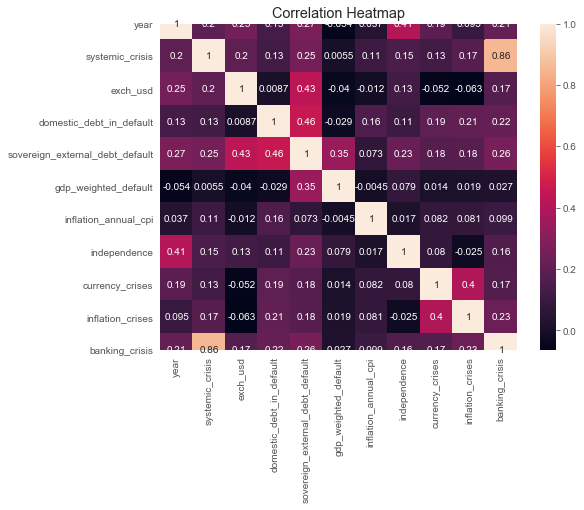

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(cleaned_df.corr(), annot = True)
plt.title('Correlation Heatmap')

There is a very strong correlation (0.86) between systemic crisis and banking crisis. <br> <br>
<b>Now, let's see  systemic crises and banking crises by country:</b>

Text(0.5, 1.0, 'Banking Crisis in Africa')

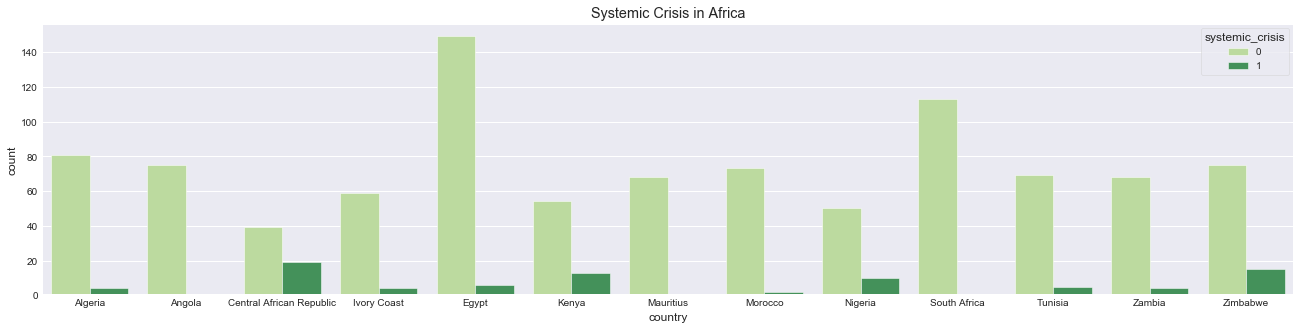

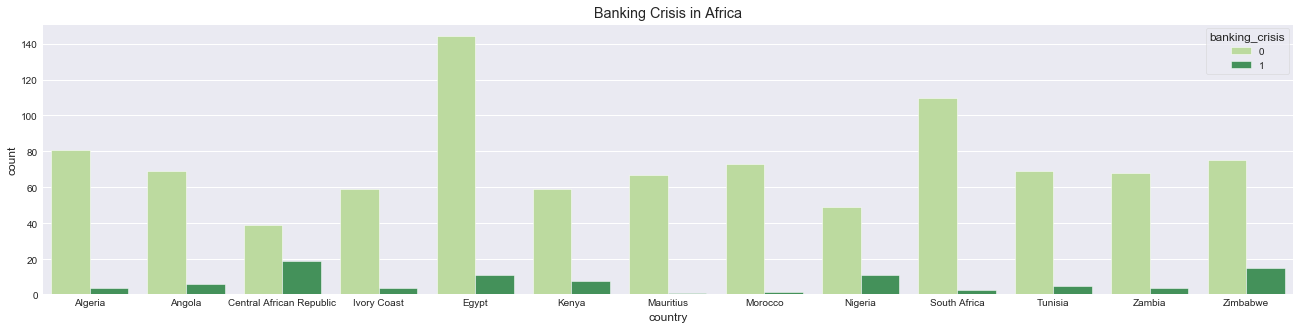

In [170]:
plt.figure(figsize=(20,5))
sns.countplot(x='country', data=cleaned_df, hue='systemic_crisis', palette = 'YlGn')
plt.title('Systemic Crisis in Africa')

plt.figure(figsize=(20,5))
sns.countplot(x='country', data=cleaned_df, hue='banking_crisis', palette = 'YlGn')
plt.title('Banking Crisis in Africa')

As we can see, the countries that had more crises (systemic or banking) were:<br>
 - Central African Repuplic<br>
 - Zimbabwe <br>
 - Nigeria <br>
 - Kenya <br><br>
<b> Let's see the behavior of crises in these countries over the years:</b>

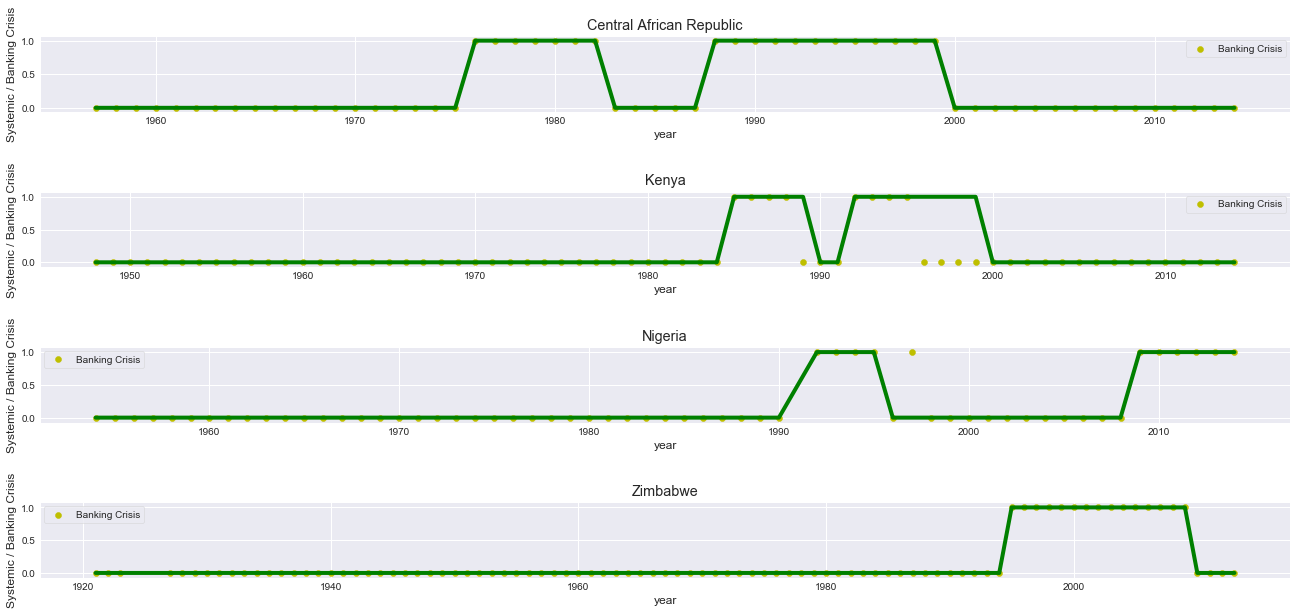

In [171]:
sys_crisis = cleaned_df[['year','country', 'systemic_crisis', 'banking_crisis']]
sys_crisis = sys_crisis[(sys_crisis['country'] == 'Central African Republic') | 
                        (sys_crisis['country']=='Zimbabwe') |
                        (sys_crisis['country']=='Nigeria') | 
                        (sys_crisis['country']=='Kenya')]
plt.figure(figsize=(20,10))
count = 1

for country in sys_crisis.country.unique():
    plt.subplot(len(sys_crisis.country.unique()),1,count)
    subset = sys_crisis[(sys_crisis['country'] == country)]
    plt.scatter(subset['year'],subset["banking_crisis"], color='y', label='Banking Crisis')
    sns.lineplot(subset['year'],subset['systemic_crisis'], color='g')
    plt.subplots_adjust(hspace=1.0)
    plt.ylabel('Systemic / Banking Crisis')
    plt.title(country)
    count+=1

Analysing these plots, our hypotesis is confirmed: When happens a banking crisis, there is a great possibility that happens a systemic crisis too.

### Currency crises in Africa

A currency crisis is brought on by a sharp decline in the value of a country's currency. This decline in value, in turn, negatively affects an economy by creating instabilities in exchange rates, meaning one unit of a certain currency no longer buys as much as it used to in another currency. <br>
<b>Let's look to the currency crises in Africa countries and make some analysis about that:</b>

Text(0.5, 1.0, 'Currency Crisis in Africa')

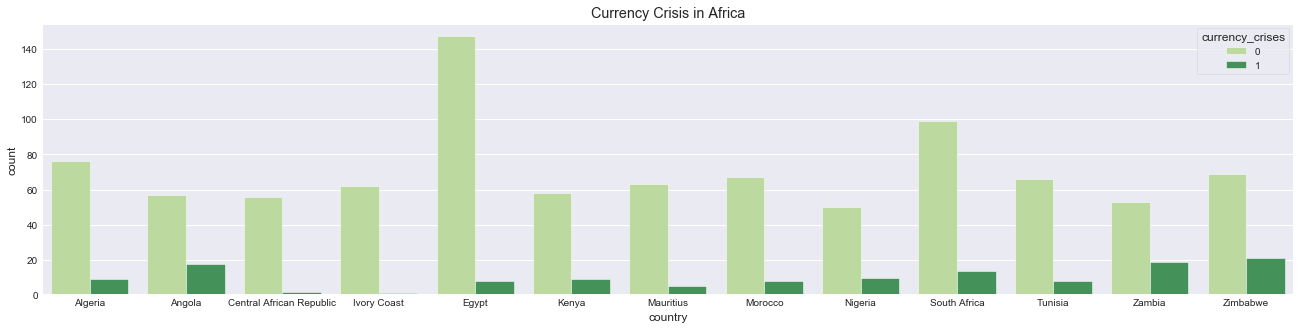

In [172]:
plt.figure(figsize=(20,5))
sns.countplot(x='country', data=cleaned_df, hue='currency_crises', palette = 'YlGn')
plt.title('Currency Crisis in Africa')

As we can see, the countries that had more currency crises were:<br>
 - Zimbabwe<br>
 - Zambia <br>
 - Angola <br>
 - South Africa <br><br>
 
<b>Now, let's see the relationship beetween currency crises and inflation crises:</b>

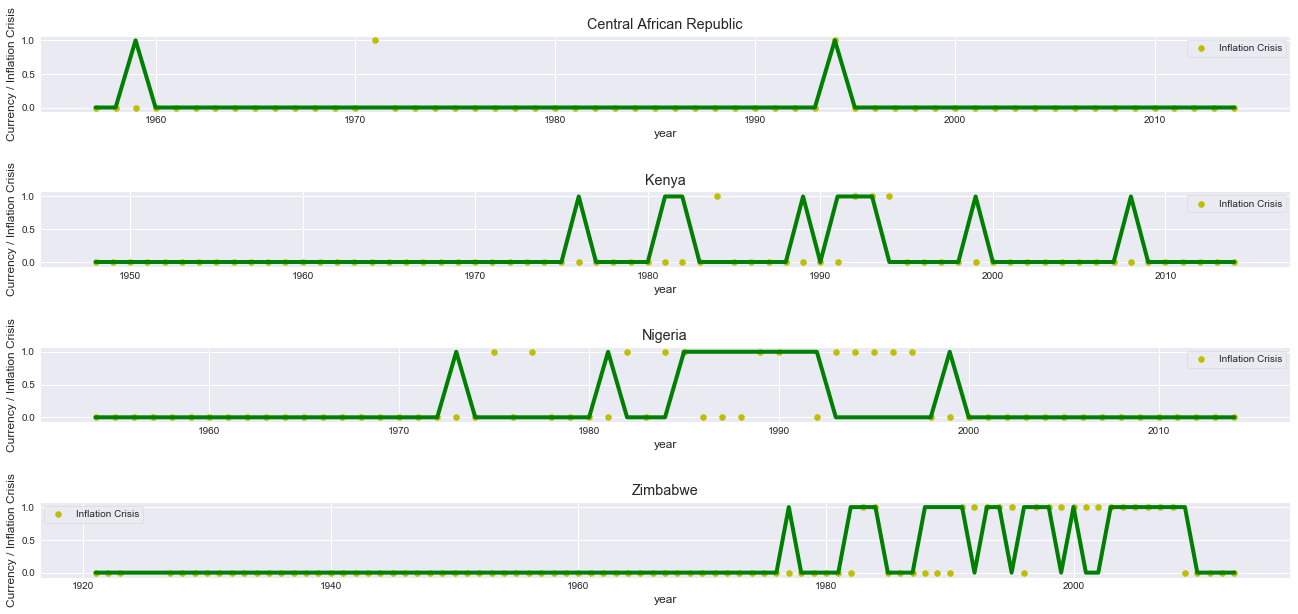

In [177]:
crr_crisis = cleaned_df[['year','country', 'currency_crises', 'inflation_crises']]
crr_crisis = crr_crisis[(crr_crisis['country'] == 'Central African Republic') | 
                        (crr_crisis['country']=='Zimbabwe') |
                        (crr_crisis['country']=='Nigeria') | 
                        (crr_crisis['country']=='Kenya')]
plt.figure(figsize=(20,10))
count = 1

for country in crr_crisis.country.unique():
    plt.subplot(len(crr_crisis.country.unique()),1,count)
    subset = crr_crisis[(crr_crisis['country'] == country)]
    plt.scatter(subset['year'],subset['inflation_crises'], color='y', label ='Inflation Crisis')
    sns.lineplot(subset['year'],subset['currency_crises'], color='g')
    plt.subplots_adjust(hspace=1.0)
    plt.ylabel('Currency / Inflation Crisis')
    plt.title(country)
    count+=1

Analysing these plots, we can see that an inflation crisis isn't related to a currency crisis.<br><br>
<b>Let's plot the exchange rate of these countries:</b>

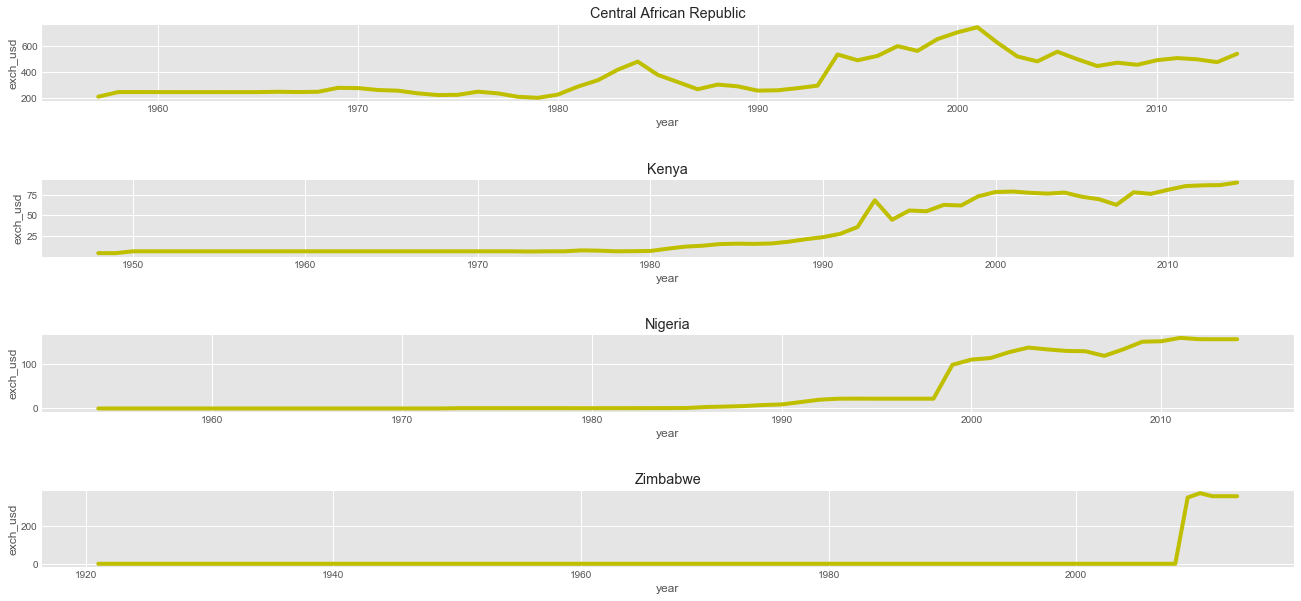

In [206]:
exc_crisis = cleaned_df[['year','country', 'exch_usd']]
exc_crisis = exc_crisis[(exc_crisis['country'] == 'Central African Republic') | 
                        (exc_crisis['country']=='Zimbabwe') |
                        (exc_crisis['country']=='Nigeria') | 
                        (exc_crisis['country']=='Kenya')]
plt.figure(figsize=(20,10))
count = 1

for country in exc_crisis.country.unique():
    plt.subplot(len(exc_crisis.country.unique()),1,count)
    subset = exc_crisis[(exc_crisis['country'] == country)]
    sns.lineplot(subset['year'],subset['exch_usd'], color='y')
    plt.subplots_adjust(hspace=1.0)
    plt.ylabel('exch_usd')
    plt.title(country)
    count+=1

### Sovereign default

Sovereign default is a failure in the repayment of a country's government debts. Countries are often hesitant to default on their debts, since doing that, they will make borrowing funds in the future difficult and expensive.<br>
<b>Let's look to the sovereign default in Africa countries:</b>

Text(0.5, 1.0, 'External sovereign default in Africa')

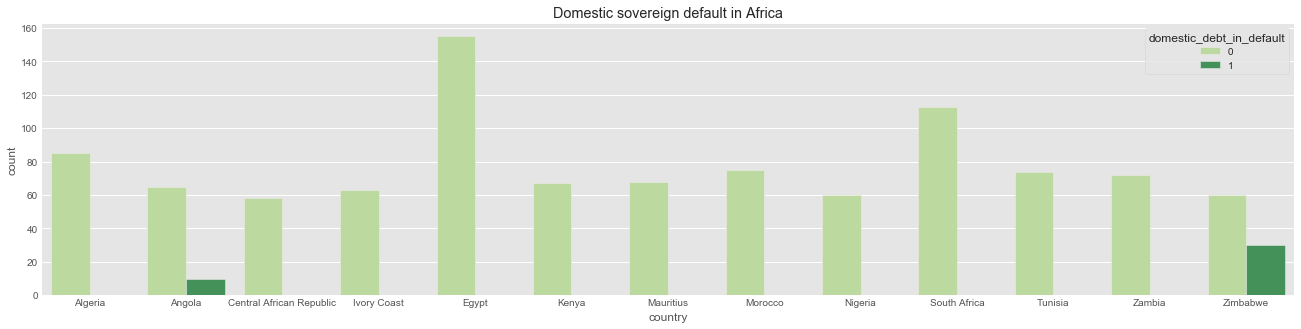

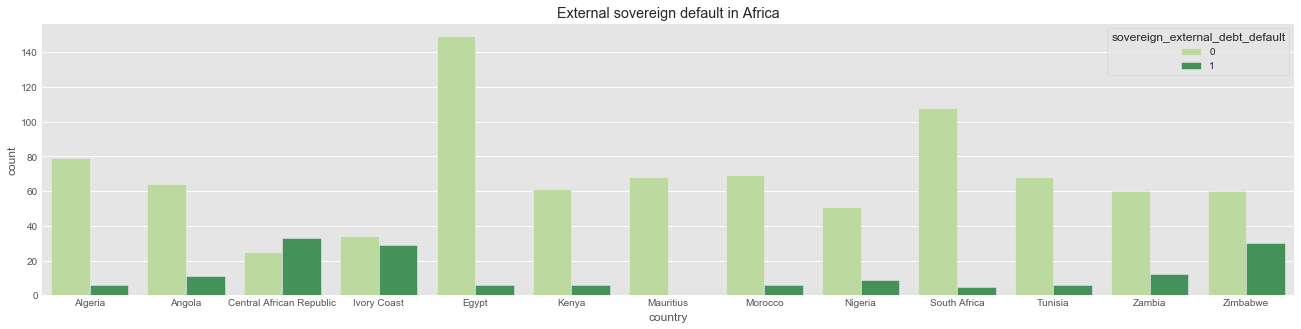

In [212]:
plt.figure(figsize=(20,5))
sns.countplot(x='country', data=cleaned_df, hue='domestic_debt_in_default', palette = 'YlGn')
plt.title('Domestic sovereign default in Africa')

plt.figure(figsize=(20,5))
sns.countplot(x='country', data=cleaned_df, hue='sovereign_external_debt_default', palette = 'YlGn')
plt.title('External sovereign default in Africa')

As we can see, in Africa countries is most common to happen a external sovereign default than a domestic sovereign defalut.

### Independence and Exchange

Analysing the data, we can see that after the country becomes independent, the exchange rates goes up.<br>
<b> Let's look the exchange rate of Africa countries before and after their independence:</b>

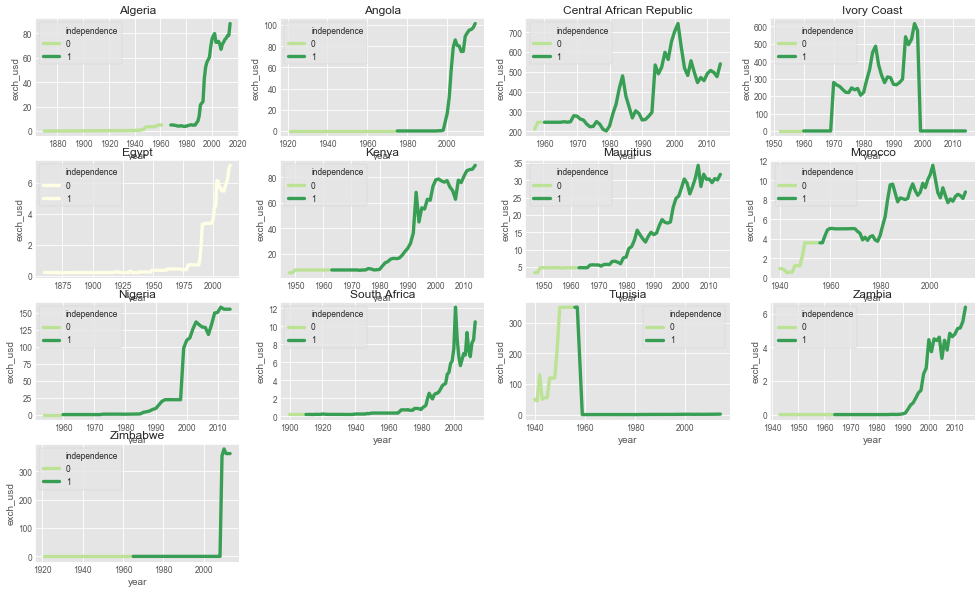

In [254]:
fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(18,12), dpi= 60)
axes = axes.flatten()
for i, ax in zip(cleaned_df['country'].unique(), axes):
    sns.lineplot(x = 'year', y = 'exch_usd', hue = 'independence', palette = 'YlGn', 
                 data = cleaned_df[cleaned_df['country'] == i], ax = ax)
    ax.set_title(i)

#Delete plots that we aren't going to use    
for i in range(13,16):
    fig.delaxes(axes[i])


#### References:

https://pgreenfinch.pagesperso-orange.fr/recupknol/k33e-systemiccrisisrisk.html<br>
https://www.investopedia.com/<br>
https://www.stackoverflow.com<br>
https://www.kaggle.com/